# Information Geometry

Author: Micael Veríssimo de Araújo (micael.verissimo@lps.ufrj.br)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.cluster import KMeans

In [2]:
data_files_path = '../data_files/data17_13TeV.AllPeriods.sgn.probes_lhmedium_EGAM2.bkg.VProbes_EGAM7.GRL_v97/'
file_name       = 'data17_13TeV.AllPeriods.sgn.probes_lhmedium_EGAM2.bkg.VProbes_EGAM7.GRL_v97_et0_eta0.npz'

plots_path      = '../plots_clusterizacao/'
my_seed         = 13

In [3]:
jpsi_data = dict(np.load(data_files_path+file_name))
jpsi_data.keys()

dict_keys(['features', 'etBins', 'etaBins', 'etBinIdx', 'etaBinIdx', 'data', 'target'])

As variáveis presentes neste data set são:

In [4]:
list_of_features = list(jpsi_data['features'])
print(list_of_features)

['avgmu', 'L2Calo_ring_0', 'L2Calo_ring_1', 'L2Calo_ring_2', 'L2Calo_ring_3', 'L2Calo_ring_4', 'L2Calo_ring_5', 'L2Calo_ring_6', 'L2Calo_ring_7', 'L2Calo_ring_8', 'L2Calo_ring_9', 'L2Calo_ring_10', 'L2Calo_ring_11', 'L2Calo_ring_12', 'L2Calo_ring_13', 'L2Calo_ring_14', 'L2Calo_ring_15', 'L2Calo_ring_16', 'L2Calo_ring_17', 'L2Calo_ring_18', 'L2Calo_ring_19', 'L2Calo_ring_20', 'L2Calo_ring_21', 'L2Calo_ring_22', 'L2Calo_ring_23', 'L2Calo_ring_24', 'L2Calo_ring_25', 'L2Calo_ring_26', 'L2Calo_ring_27', 'L2Calo_ring_28', 'L2Calo_ring_29', 'L2Calo_ring_30', 'L2Calo_ring_31', 'L2Calo_ring_32', 'L2Calo_ring_33', 'L2Calo_ring_34', 'L2Calo_ring_35', 'L2Calo_ring_36', 'L2Calo_ring_37', 'L2Calo_ring_38', 'L2Calo_ring_39', 'L2Calo_ring_40', 'L2Calo_ring_41', 'L2Calo_ring_42', 'L2Calo_ring_43', 'L2Calo_ring_44', 'L2Calo_ring_45', 'L2Calo_ring_46', 'L2Calo_ring_47', 'L2Calo_ring_48', 'L2Calo_ring_49', 'L2Calo_ring_50', 'L2Calo_ring_51', 'L2Calo_ring_52', 'L2Calo_ring_53', 'L2Calo_ring_54', 'L2Calo_ri

Para o processo de clusterização serão utilizadas $2$ variáveis: $\langle \mu \rangle$ e $E_T$.

In [99]:
var_indexes = [list_of_features.index('avgmu'),
               list_of_features.index('L2Calo_et'),]

In [100]:
print(var_indexes)

[0, 101]


In [167]:
data_      = jpsi_data['data'][:, var_indexes]
mu_filter  = data_[:,0] <= 60
sgn_filter = jpsi_data['target'][mu_filter]==1
bkg_filter = jpsi_data['target'][mu_filter]==0
data_      = data_[mu_filter,:]
print(data_.shape)

(233256, 2)


In [169]:
sgn_choices_filter = np.random.choice(data_[sgn_filter].shape[0], size=300)
bkg_choices_filter = np.random.choice(data_[bkg_filter].shape[0], size=300)
choices_filter     = np.concatenate((sgn_choices_filter,bkg_choices_filter))

In [170]:
data_ = data_[choices_filter,:]
y     = jpsi_data['target'][choices_filter]
print(data_.shape)

(600, 2)


## Clusterização Utilizando Divergências de Bregman

As divergências de Bregman são divergências da forma

**Definição** (Bregman, 1967; Censor and Zenios, 1998) Seja $\phi : S \to \mathbb{R}$, $S = \text{dom}(\phi)$ uma função estritamente convexa definida em um conjunto convexo $S \subset \mathbb{R}^d$ tal que $\phi$ é diferenciável em seu interior relativo $(\text{ri}(S))$, assumindo $\text{ri}(S)$ não vazio. A divergência de Bregman $D_{\phi} : S\times \text{ri}(S) \to [0,\infty)$ é definida como:

$$D_{\phi}(x,y) = \phi(x) - \phi(y) - \langle x-y, \nabla\phi(y)\rangle$$

<img src="../misc/bregman_divs_table.png"  style="width: 20cm;"/>

# Usando Ringer

In [190]:
km = KMeans(n_clusters = 3, n_jobs = 4, random_state=my_seed)
km.fit(data_)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
       random_state=13, tol=0.0001, verbose=0)

In [191]:
centers = km.cluster_centers_
print(centers)

[[  32.06994  5502.6074  ]
 [  31.794285 6468.757   ]
 [  31.766108 4663.559   ]]


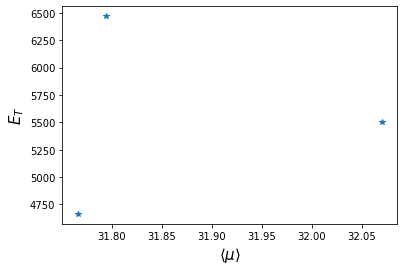

In [193]:
plt.plot(centers[:, 0], centers[:, 1], '*')
plt.xlabel(r'$\langle\mu\rangle$', fontsize=15)
plt.ylabel(r'$E_T$', fontsize=15)
plt.show()

Text(0.5, 1.0, 'Predicted')

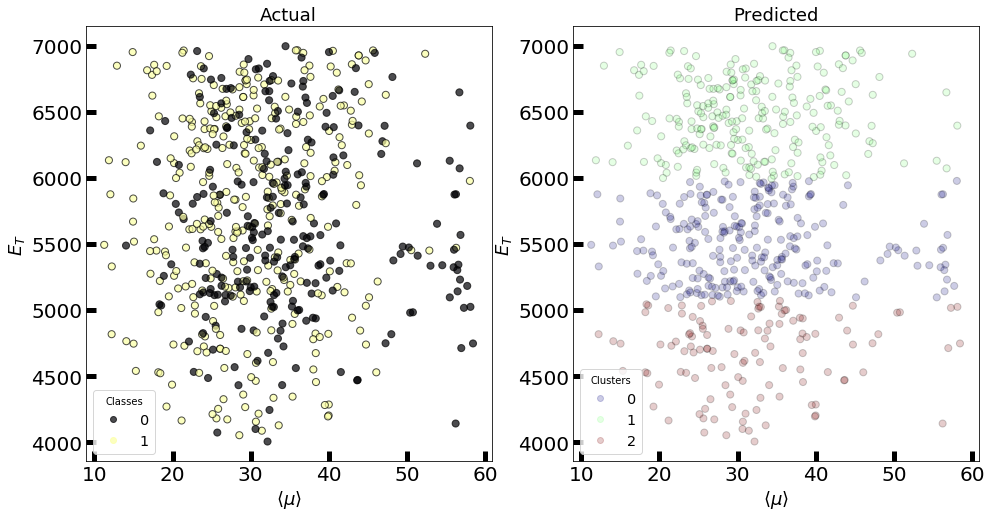

In [195]:
#this will tell us to which cluster does the data observations belong.
new_labels = km.labels_
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
scarter = axes[0].scatter(data_[:, 0], data_[:, 1], c=y, cmap='inferno',
edgecolor='k', s=50, alpha=.7)
axes[0].legend(*scarter.legend_elements(),
                    loc="best", title="Classes", fontsize='x-large')

scarter1 = axes[1].scatter(data_[:, 0], data_[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=50, alpha=.2)
axes[1].legend(*scarter1.legend_elements(),
                    loc="best", title="Clusters", fontsize='x-large')

axes[0].set_xlabel(r'$\langle\mu\rangle$', fontsize=18)
axes[0].set_ylabel(r'$E_T$', fontsize=18)
axes[1].set_xlabel(r'$\langle\mu\rangle$', fontsize=18)
axes[1].set_ylabel(r'$E_T$', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

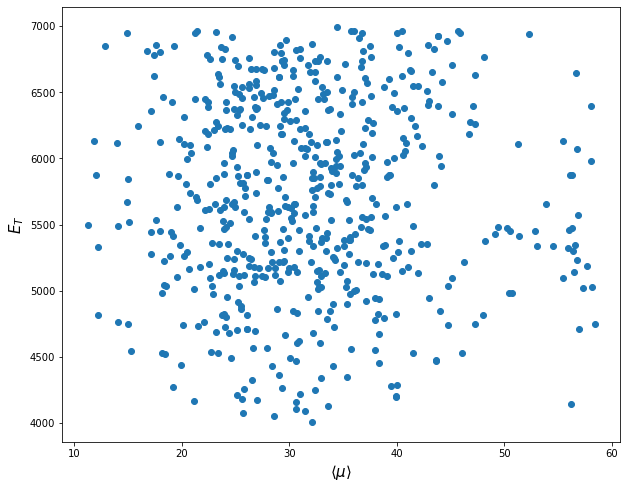

In [196]:
plt.figure(figsize=(10,8))
plt.plot(data_[:, 0], data_[:, 1], 'o')
plt.xlabel(r'$\langle\mu\rangle$', fontsize=15)
plt.ylabel(r'$E_T$', fontsize=15)
plt.show()

In [137]:
from scipy import stats

In [ ]:
a = stats.zscore(data_[:,0])
plt.figure(figsize=(10,8))
plt.hist(a, bins=50)
plt.yscale('log')
#plt.hist(sgn_data[:,0], bins=30)
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
plt.hist(data_[:,0], bins='sqrt')
#plt.hist(sgn_data[:,0], bins=30)
plt.show()

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)#, projection='3d')
ax.scatter(data_[:,1], data_[:,0], s=10, alpha=0.6, edgecolors='w')
#ax.scatter(np.sum(bkg_data[:,1:], axis=1), bkg_data[:,0], s=10, alpha=0.6, edgecolors='w')

ax.set_xlabel(r'$E_{T_{HAD}}$')
ax.set_ylabel(r'$\eta$')
#ax.set_zlabel(r'$\langle\mu\rangle$')

plt.show()